In [2]:
# Data.world configuration
!pip install datadotworld
!pip install datadotworld[pandas]

     |████████████████████████████████| 163kB 3.0MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 245kB 34.5MB/s 
     |████████████████████████████████| 174kB 46.2MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10768 sha256=61cf772054642b42a40cbfd35558592f7dbb5de63a0845e81ad596db3dc77dcb
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-cp36-none-any.whl size=7383 sha256=62bac174ab99b5790b78484532d8bb38cf068203744c5d085bdb844f22bb7bb9
  Stored in directory: /root/.cache/pip/wheels/3f/8a/cb/38917fd1ef4356b9870ace7331b

In [0]:
# !dw configure

In [0]:
# Importing libraries
from google.colab import drive
import pandas as pd
import numpy as np

#Importing data.world library
import datadotworld as dw

In [0]:
# Linking Colab to Google Drive
drive.mount("/content/drive")

In [0]:
cd drive

/content/drive


In [0]:
cd "My Drive/Colab Notebooks/dataworkshop_matrix"

/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix


In [0]:
ls

ColabDriveGithub.ipynb  HelloGithub.ipynb  LICENSE  Matrix_part1/  README.md


In [0]:
# Adding data.world dataset to gitignore
!mkdir data

In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
# Loading dataset from data.world
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [0]:
data

LocalDataset('/root/.dw/cache/datafiniti/mens-shoe-prices/latest/datapackage.json')

In [0]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [0]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [0]:
df.shape

(19387, 48)

In [0]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
6116,AVpfFXHmLJeJML432B7M,NaN,Justin Boots,"Men's Boots,Shoes,Clothing, Shoes & Jewelry,Me...",Bay,NaN,2016-01-02T02:40:11Z,2016-03-30T21:16:33Z,NaN,NaN,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/11862/prod_383...,NaN,justinboots/174445,NaN,17-4445,NaN,Justin Boots Work Boots Mens J-max Rugged Gauc...,194.95,194.95,NaN,NaN,NaN,NaN,USD,2016-01-02T02:40:11Z,2016-03-30T00:00:00Z,NaN,true,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,"10.5,10,8.5,6,9.5,6.5,11.5,9,8,11,12","[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
4279,AVpe8J721cnluZ0-aTdu,NaN,Jewelry Adviser Gifts,"Jewelry,Fashion Jewelry,Fashion Rings,Clothing...",NaN,NaN,2016-03-11T08:19:53Z,2016-03-15T23:07:01Z,NaN,1 in x 1 in x 1 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/6140/prod_2787...,NaN,jewelryadvisergiftssolarpoweredwindturbinealar...,NaN,GM13869,NaN,Jewelry Adviser Gifts Solar Powered Wind Turbi...,48.83,48.83,NaN,NaN,NaN,NaN,USD,2016-03-11T08:19:53Z,2016-03-14T00:00:00Z,NaN,true,JewelryAdviser,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
13306,AVpfmgFmLJeJML43AP35,NaN,New Balance,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-06T23:58:14Z,2016-11-06T23:58:14Z,"[{""dateSeen"":[""2016-11-06T23:58:14Z""],""sourceU...",NaN,8.899692e+11,"[{""key"":""Material"",""value"":[""Synthetic""]},{""ke...",NaN,https://i5.walmartimages.com/asr/0c172f55-e628...,NaN,"newbalance/ml574sib,889969168019,0889969168019",New Balance,ML574SIB,"[{""dateSeen"":[""2016-11-06T23:58:14Z""],""name"":""...",New Balance Ml574 Men Round Toe Synthetic Bla...,75.00,75.00,NaN,NaN,new,NaN,USD,2016-11-06T23:58:14Z,2016-11-05T00:00:00Z,NaN,false,ApparelSave - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/New-Balance-ML574-M...,NaN,NaN,NaN,"10.5,10,8.5,9.5,9,8,11",NaN,https://www.walmart.com/ip/New-Balance-ML574-M...,889969168019,NaN,NaN,NaN
8402,AVpfLNgeilAPnD_xWitt,NaN,Rock Revival,"Clothing, Shoes & Accessories,Men's Clothing,J...",Military,NaN,2016-08-01T01:24:50Z,2016-10-05T15:21:58Z,"[{""dateSeen"":[""2016-08-23T11:50:58Z""],""sourceU...",NaN,6.890047e+11,"[{""key"":""Inseam"",""value"":[""34""]},{""key"":""Condi...",NaN,http://i.ebayimg.com/images/g/nLcAAOSwgY9XdbDC...,NaN,"689004659171,0689004659171,200rockrevivalmensj...",NaN,NaN,"[{""dateSeen"":[""2016-10-04T00:00:00Z""],""name"":""...",$200 Rock Revival Men's Jeans Rp9931a200 Teles...,96.00,96.00,NaN,NaN,New with tags,NaN,USD,2016-08-01T01:24:50Z,2016-07-08T00:00:00Z,NaN,false,NaN,winning bid,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/200-Rock-Revival-Mens-...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/200-R...",http://www.ebay.com/itm/200-Rock-Revival-Mens-...,689004659171,NaN,NaN,NaN
7141,AVpfWQl7ilAPnD_xaIDT,NaN,Fossa Apparel,"Clothing, Shoes & Jewelry,Clothing,Men's Cloth...",NaN,NaN,2016-03-22T00:25:26Z,2016-03-25T06:03:17Z,NaN,5 in x 10 in x 10 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/1363/prod_2314...,NaN,"fossaapparel/9920chocolate3xl,fossaapparel9920...",NaN,9920-chocolate-3XL,NaN,Fossa Apparel 9920-chocolate-3xl 3x-large Harb...,84.29,84.29,NaN,NaN,NaN,NaN,USD,2016-03-22T00:25:26Z,2016-03-22T00:00:00Z,NaN,false,"UnbeatableSale.com, Inc.",NaN,NaN,NaN,NaN,NaN,http://www.sears.

In [0]:
# unikalne etykiety dla prices_currency
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [0]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
PalmBeach Jewelry - Walmart.com                           3
new                                                       3
New with box                                              3
Wholesale Costume and Party Supplies - Walmart.com        2
New without tags                                          1
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
Name: prices_currency, dtype: int64

In [0]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
new                                                   0.000155
New with box                                          0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
New without tags                                      0.000052
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[ df.prices_currency == 'USD' ].copy()

In [0]:
df_usd.shape

(18524, 48)

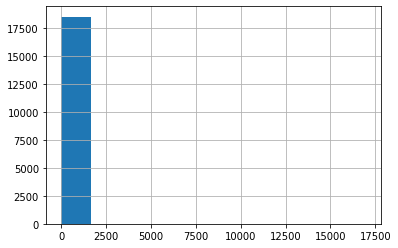

In [0]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [0]:
# we can obsereve on the histogram the statistical outliers - shoes that cost 17500 USD
# clearing the statistical outliers by cutting the outlier - 1%:
filter_max = np.percentile( df_usd['prices_amountmin'], 99 )
filter_max

895.0

In [0]:
# 99% of shoes cost 895 USD or less
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]

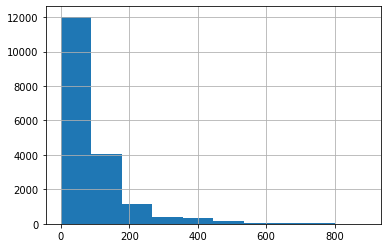

In [0]:
df_usd_filter.prices_amountmin.hist()

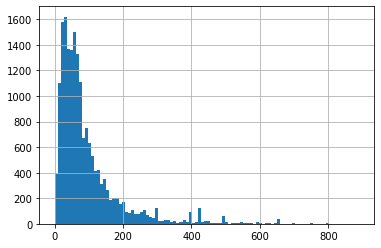

In [0]:
# splitting by 100 bins (every 900/100 = 9 USD)
df_usd_filter.prices_amountmin.hist(bins=100)